In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn._statistics as stats
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv',usecols = ['Survived','Age','Fare'])

In [52]:
df.head()    

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [54]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [55]:
age_mean = df['Age'].mean()
age_mode = df['Age'].mode()
age_median = df['Age'].median()

In [56]:
df['Age'].fillna(age_mean,inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9476\596629441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_mean,inplace = True)


In [57]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [58]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [59]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

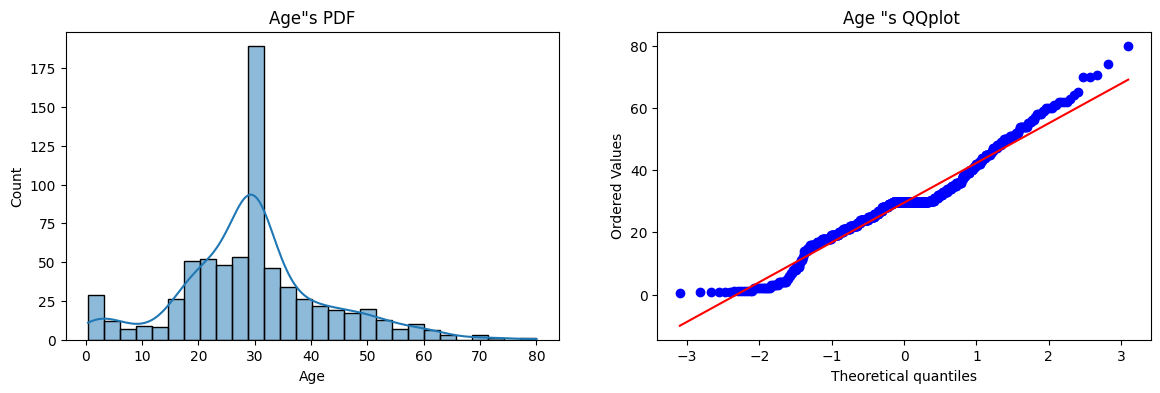

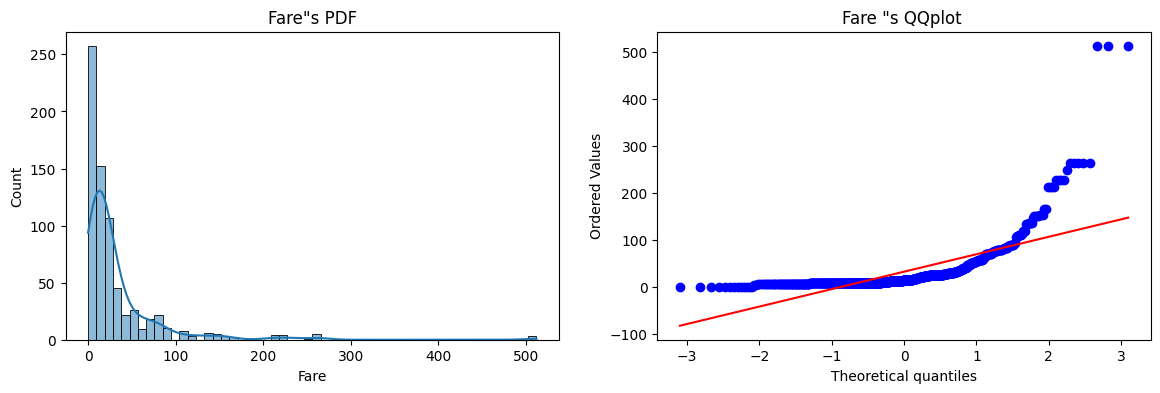

In [61]:
for x in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[x],kde = True)
    plt.title(f'{x}"s PDF')

    plt.subplot(122)
    stats.probplot(X_train[x],dist="norm",plot = plt)
    plt.title(f'{x} "s QQplot ')
    plt.plot()



[]

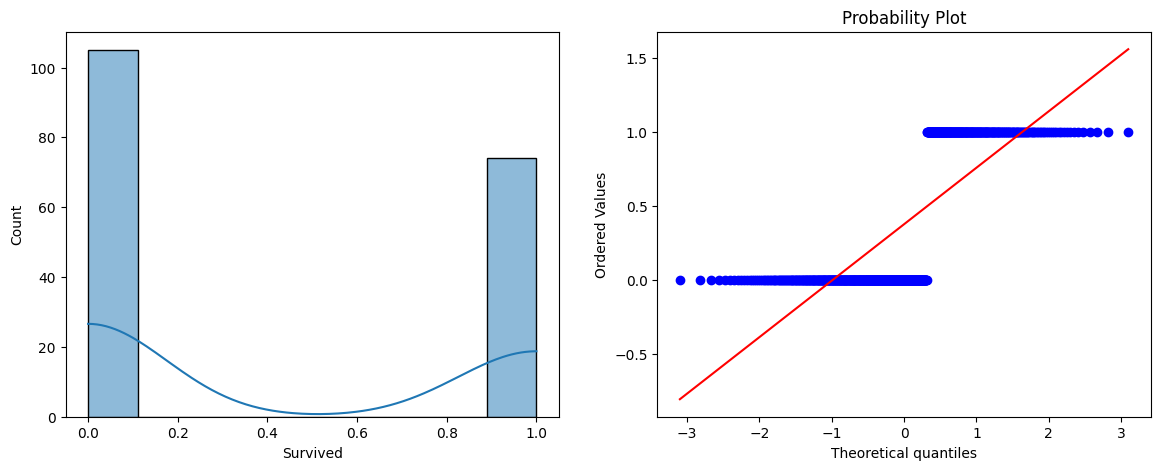

In [89]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.histplot( y_test , kde = True)

plt.subplot(122)
stats.probplot(y_train , dist = 'norm' , plot = plt)
plt.plot()

In [108]:
# Applying log tranformation on X_train and X_test to check for improvements in the distibution and qq-plot 
# , basically we are aiming for normal distribution and decrease skewness.
log_transformer = FunctionTransformer( func = np.log1p )

In [109]:
# Applying this on X_train and X_test.
X_train_log_transformed = log_transformer.fit_transform(X_train)
X_test_log_transformed = log_transformer.transform(X_test)

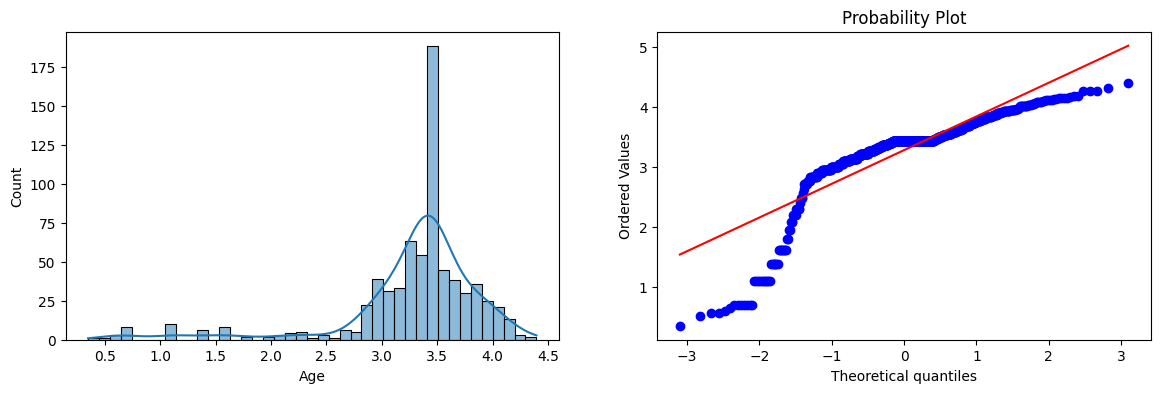

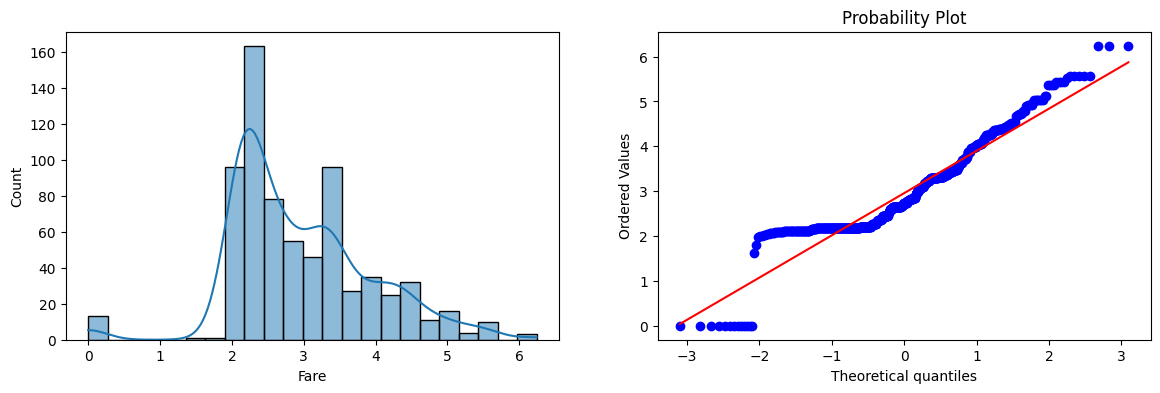

In [110]:
# Histplot and QQplot after transformation :
for x in X_train_log_transformed.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(X_train_log_transformed[x],kde=True)

    plt.subplot(122)
    stats.probplot(X_train_log_transformed[x],plot = plt , dist = 'norm')
    plt.plot()

In [111]:
# As we can see the LogTransformer is highly effective for 'Fare' and can be used for it 
# , for 'Age' , it reduced the normal distribution , so we wont use it in there 

# So we will use Column Transformer on the 'Fare' column only
# Also make sure to convert the array back to DataFrame as after the Transformer operation a numpy array is returned 

In [112]:
# Now lets try Yeo-johnson transformer "Exponent " one and check whether it improves the results
yeo_johnson_transformer = PowerTransformer( method ='yeo-johnson' )

In [113]:
X_train_yj = yeo_johnson_transformer.fit_transform(X_train)
X_test_yj = yeo_johnson_transformer.transform(X_test)

In [114]:
X_train_yj = pd.DataFrame(X_train_yj,columns = X_train.columns)

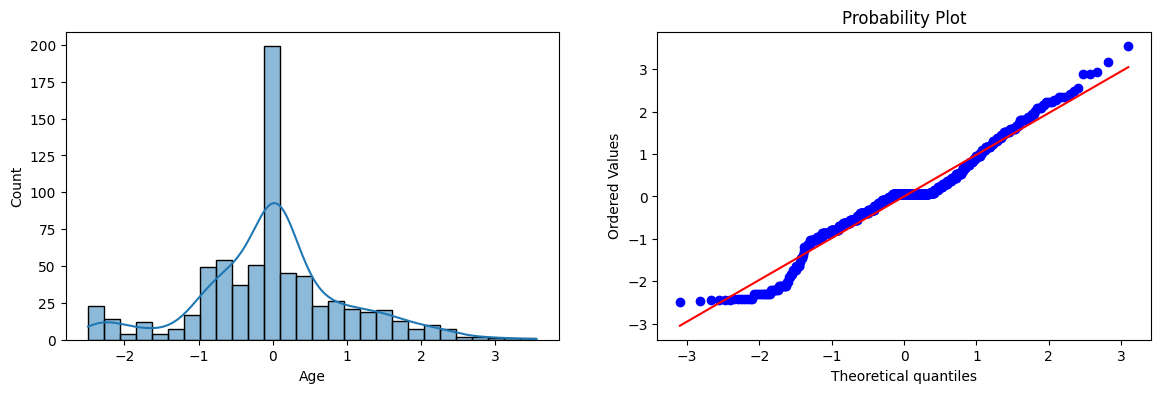

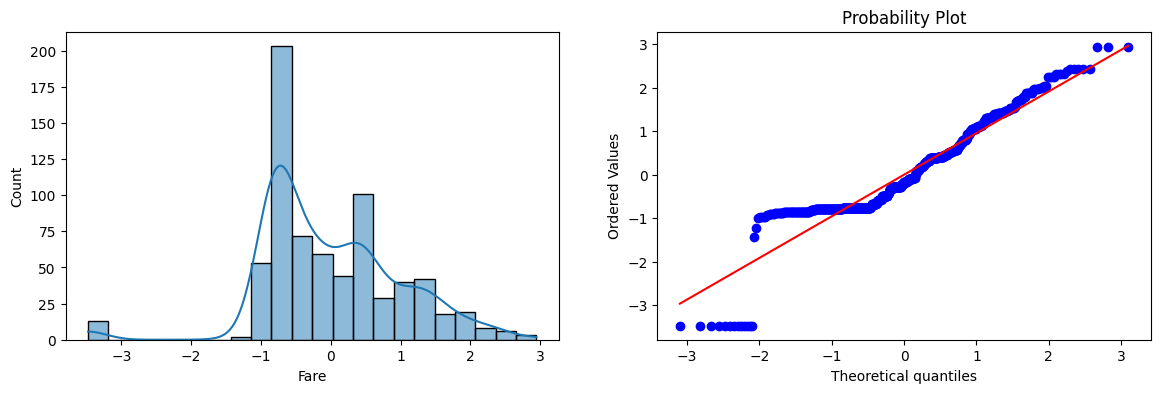

In [127]:
# Histplot and QQplot after yeo-johnson transformation :
for x in X_train_yj.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(X_train_yj[x],kde=True)

    plt.subplot(122)
    stats.probplot(X_train_yj[x],plot = plt , dist = 'norm')
    plt.plot()

In [128]:
yeo_johnson_transformer.lambdas_

array([ 0.84991107, -0.09664148])

In [129]:
# As we see this performs better and gives better result then log transformer .env

In [130]:
# Now lets try Square root transformer and check how it works 
square_root_transformer = FunctionTransformer(func = np.sqrt)

In [131]:
X_train_sqrt_transformed  = square_root_transformer.fit_transform(X_train)
X_test_sqrt_transformed = square_root_transformer.transform(X_test)

In [132]:
X_train_sqrt_transformed = pd.DataFrame(X_train_sqrt_transformed,columns = X_train.columns)

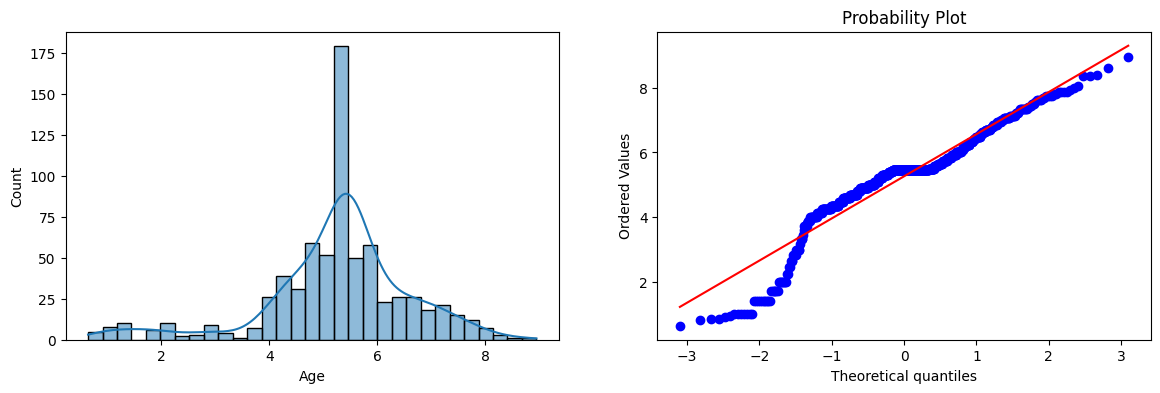

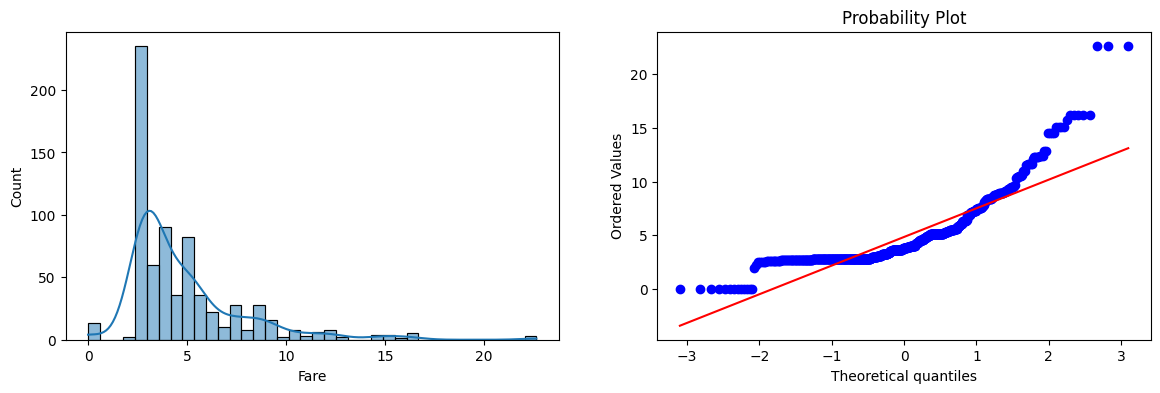

In [134]:
# Histplot and QQplot after Function : Sqrt transformation :
for x in X_train_sqrt_transformed.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(X_train_sqrt_transformed[x],kde=True)

    plt.subplot(122)
    stats.probplot(X_train_sqrt_transformed[x],plot = plt , dist = 'norm')
    plt.plot()

In [145]:
# Now lets try Reciprocal transformer and check how it works 
reciprocal_transformer = FunctionTransformer(lambda x : 1/(x+0.00001))

In [146]:
X_train_reciprocal_transformed  = reciprocal_transformer.fit_transform(X_train)
X_test_reciprocal_transformed = reciprocal_transformer.transform(X_test)

In [147]:
X_train_sqrt_transformed = pd.DataFrame(X_train_sqrt_transformed,columns = X_train.columns)

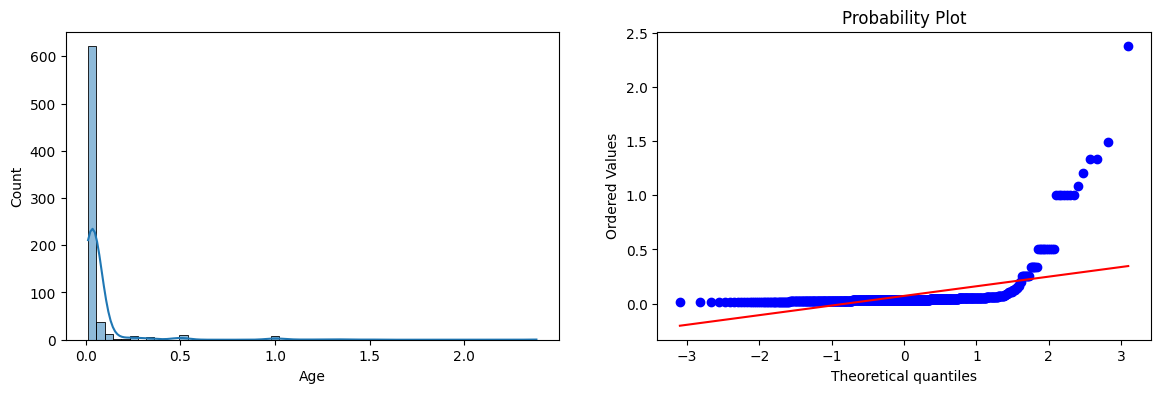

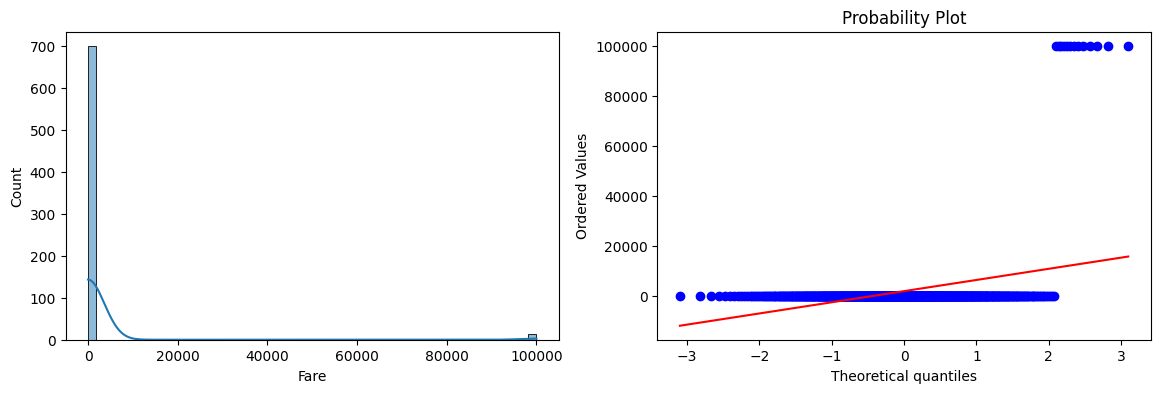

In [148]:
# Histplot and QQplot after Function : Sqrt transformation :
for x in X_train_reciprocal_transformed.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(X_train_reciprocal_transformed[x],kde=True)

    plt.subplot(122)
    stats.probplot(X_train_reciprocal_transformed[x],plot = plt , dist = 'norm')
    plt.plot()

In [149]:
# Now lets try 'Box-cox' transformercheck whether it improves the results (This can be checked before yeo-johnson).
box_cox_transformer = PowerTransformer( method ='box-cox' )

In [152]:
# If u try to apply with X_train ju will get a warning for negative value, So apply with +0.00001
X_train_bx = box_cox_transformer.fit_transform(X_train + 0.00001)
X_test_bx = box_cox_transformer.transform(X_test+ 0.00001)

In [153]:
X_train_bx = pd.DataFrame(X_train_bx,columns = X_train.columns)

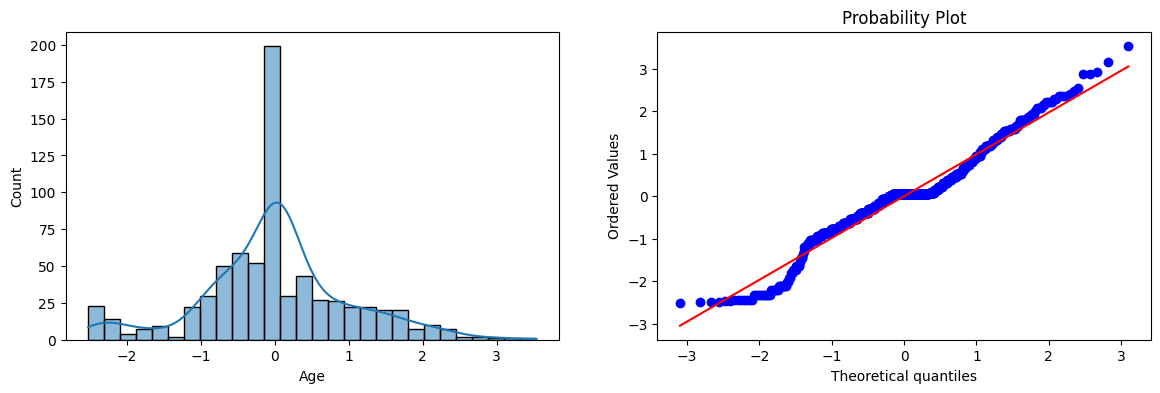

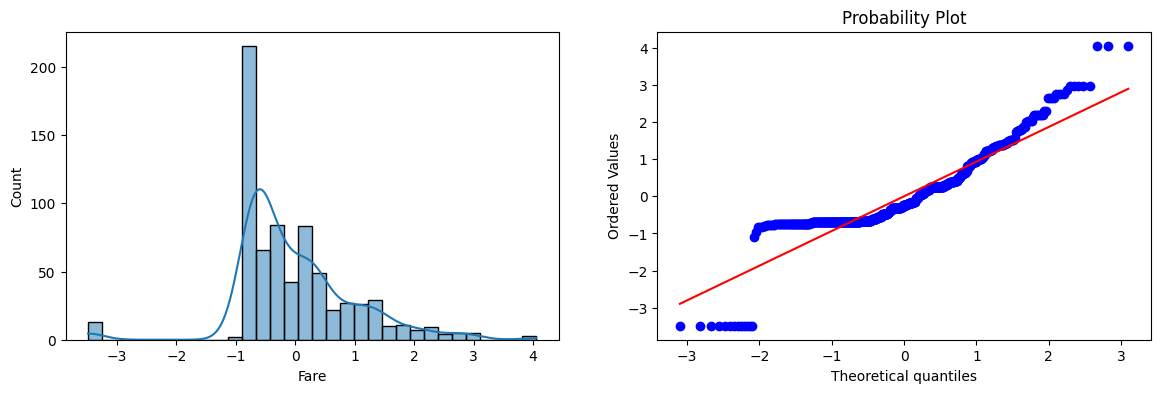

In [155]:
# Histplot and QQplot after Box-Cox transformation :
for x in X_train_bx.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(X_train_bx[x],kde=True)

    plt.subplot(122)
    stats.probplot(X_train_bx[x],plot = plt , dist = 'norm')
    plt.plot()

In [156]:
# This also gives a pretty good result like Yeo-Johnson but slightly less better 

In [157]:
# Conculsion at this point based on my observation we can do two things :
#   1) Apply yeo-johnson transformation on both X columns 
#    ( as it automaticaly detcts for normal distribution and doesnt interfere much wiht it ) , this is the best choice here . 
#   2) Otherwise we can apply yeo-johnson to 'Age' column so we dont interfere with it , and apply log tramsform to the 'Fare" column.

Now we will do all the steps using pipelining an transformers 

In [160]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

Column_preprocessor = ColumnTransformer(
    transformers = [
                        ('imputed_age_mean',SimpleImputer(strategy='mean'),['Age']),
                        ('yeo_johnson_on_age_and_fare',PowerTransformer(method='yeo-johnson'),['Age','Fare'])
    ],
    remainder = 'passthrough'
)

In [162]:
main_pipe = Pipeline(
        [
            ('column_pre',Column_preprocessor),
            ('logr',LogisticRegression())
        ]
)

In [163]:
main_pipe.fit(X_train,y_train)

,steps,"[('column_pre', ...), ('logr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('imputed_age_mean', ...), ('yeo_johnson_on_age_and_fare', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [164]:
main_pipe.score(X_train,y_train)

0.6713483146067416

In [170]:
cvs_mean  = cross_val_score(main_pipe,X_train,y_train,cv = 10,scoring='accuracy').mean()

In [171]:
cvs_mean

np.float64(0.6628912363067292)

In [173]:
# We can add more columns especialy the 'Sex' column and the family and siblings column to improve the model using OneHotEncoder